## Simple Linear Regression

In [14]:
# Step1-Importing the libraries
import numpy as np  # For handling numerical data
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression

In [15]:
# Step-2-Define the dataset(Experience in years and corresponding Salary in $1000s)

np.random.seed(42) # Ensuring reproducibility of random noise
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1) # Independent variable (Experience)
true_salaries = np.array([30,35,40,45,50,55,60,65,70,75]) # True salary values

In [16]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
y = true_salaries + noise  # Final dependent variable with noise

In [17]:
# Step3-Create a Linear Regression Model
model = LinearRegression() #Initialize the model

In [18]:
# Step4-Train the model using the dataset
model.fit(x,y) #The model learns the best-fit line by minimizing the error

LinearRegression()

In [37]:
# Step5-get the values of slope (m) and intercept (c) from the trained model
m = model.coef_[0] # Coefficient (slope) of the regression line
c = model.intercept_ # Intercept (where the line crosses the Y-axis)
 
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: 22.281814051916896
Coefficients: [4.77543541]


In [38]:
# Step6-Display the equation of the line
print(f"Equation of the line: Y = {m:.2f}X + {c:.2f}")

Equation of the line: Y = 4.97X + 27.43


In [39]:
# Step7-Predict values using the model
y_pred = model.predict(x) #Predict salaries for the given experience values

In [40]:
# 1.Mean Squared Error(MSE) - Measure average squared difference between actual and predicted values
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 11.75


In [41]:
# 2.Mean Absolute Error (MAE) - Measures average absolute difference between actual and predicted values
mae = mean_absolute_error(y,y_pred)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")

Mean Absolute Error (MAE) : 2.87


In [42]:
# 3. Root Mean Squared Error (RMSE) - Measures standard deviation of residuals (errors)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 3.43


In [43]:
# 4. R-Squared (R^2) - Represents how well the model fit  the data (0 to 1, where 1 is best)
r2 = r2_score(y, y_pred)
print(f"R-Squared (R^2): {r2:.2f}")

R-Squared (R^2): 0.95


In [44]:
# 5. Adjusted R-Squared (r^2_adj) - Adjusted for the number of predictors, btter for multiple regression
n = len(y) #Number of observations
p = 1 #Number of independent variables (Experience)
adj_r2 = 1-((1-r2) * (n-1) / (n-p-1))
print(f"Adjusted R_Squared: {adj_r2:.2f}")

Adjusted R_Squared: 0.94


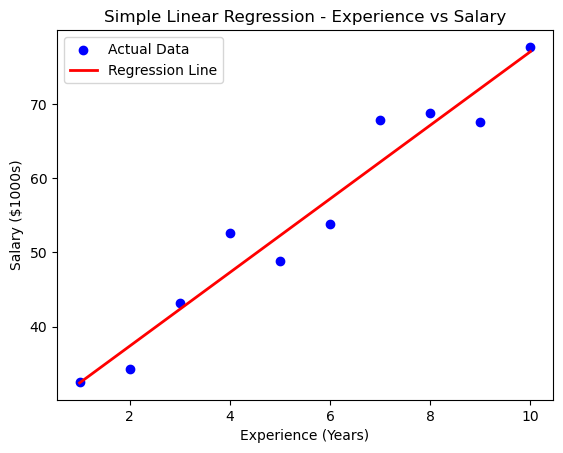

In [45]:
# 6. Plot the actual data points
plt.scatter(x, y, color='blue', label='Actual Data') #Scatter plot of actual values

# 7. Plot the Regression line
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line') #Regression line

# 8. Add labels and legend
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($1000s)')
plt.title('Simple Linear Regression - Experience vs Salary')
plt.legend()

#9. Display the Graph
plt.show()

In [46]:
#User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input('\n Enter years of experience to predict salary (or -1 to exit):'))
        if exp == -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter  valid number!")


 Enter years of experience to predict salary (or -1 to exit):4
Predicted Salary for 4.0 years of experience: $47.29K

 Enter years of experience to predict salary (or -1 to exit):5
Predicted Salary for 5.0 years of experience: $52.26K

 Enter years of experience to predict salary (or -1 to exit):-1


In [48]:
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
import statsmodels.api as sm  # For OLS Regression

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(x)  # Transforming X to polynomial features

In [49]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:09:53   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [50]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [53]:
#Step 12: Prediction of the features
#User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit):"))
        if exp <= -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number")   


Enter years of experience to predict salary (or -1 to exit):4
Please enter a valid number

Enter years of experience to predict salary (or -1 to exit):5
Please enter a valid number

Enter years of experience to predict salary (or -1 to exit):-1
